# ResNet: Residual Network

* gano el concurso de ILSVRC : 2015. Hay publicaciones (ver notas de clase)

* De Microsoft Research

* Autores He, et. al. [articulo xarch](https://arxiv.org/abs/1512.03385)

* La motivacion: Las redes estaban creciendo en tamano (muchas capas) de forma  exagerada. Esto producia un problema por que ya el costo era damiado y las ganancias pocas (costo / beneficio). Aparece el problema de "vanishing gradient" (mas adelante estudiamos el "vanishing/exploding" gradient). Habia que buscar la forma de que con muchas capas el gradiente no se volviera pequeno y He, et. al., encontraron esto.




Justifiquemos el nombre residual:       
Asumimos que $\mathcal{H}(x)$ es la funcion que se quiere aproximar con un pila de capas (universal approximator theorem). El **residuo** entre la funcion y los datos de entradas esta dado por
$$ \mathcal{F} = \mathcal{H} - x $$. De aca la palabra residual.
De esta ecuacion teneos que el modelo que queremos construir esta dado por
$$\mathcal{H} = \mathcal{F} + x $$

Por  el ResNet no sufre el problema del "vanishing gradient"?

[George Phillip et al.](https://arxiv.org/abs/1712.05577)  lo prueban (pero este curso no da para eso)

Importamos algunas figuras que ilustran el problema:  

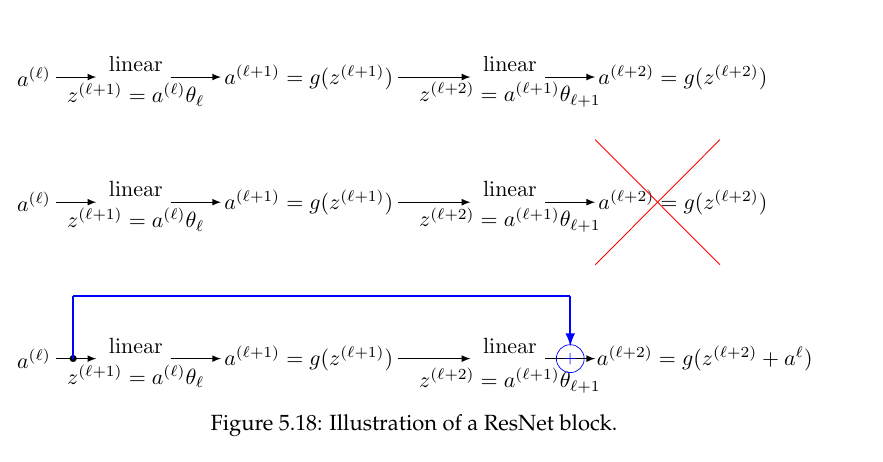

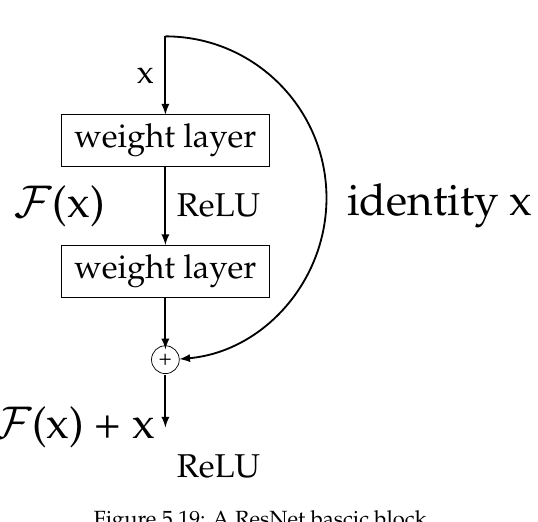

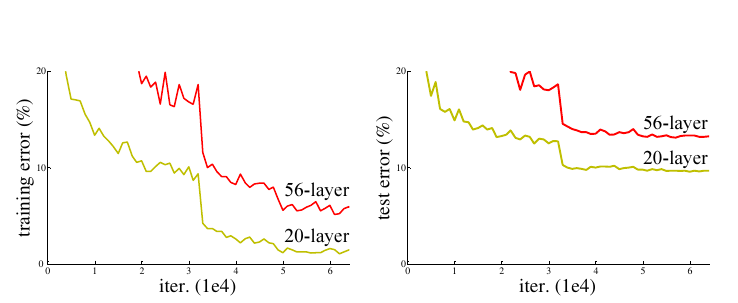

He. et. al encontraron que este problema (de que mas capas eran mas error) se solucioncon el ResNet. Mirar la grafica siguiente:     

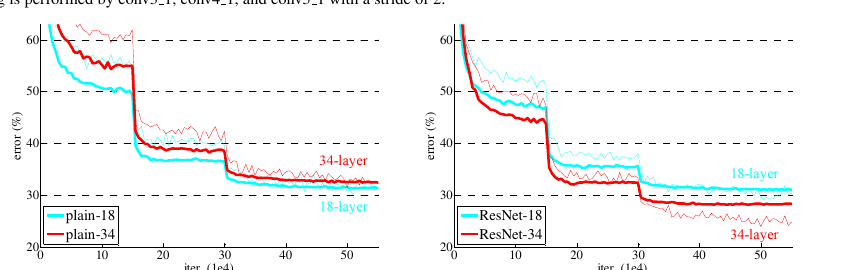

9:50 seguimos


## Implementacion del ResNet

In [ ]:
def residual_module(x, n_filtros):
    # convolucion capas 1 y 2
    conv1 = Conv2D(n_filtros, (3,3), padding='same',
                  activation='relu', 
                   kernel_initializer='he_normal')(x)
    conv2 = Conv2D(n_filtros, (3,3), padding='same',
                  activation='relu', 
                   kernel_initializer='he_normal')(conv1)
    # adicionamos la entrada (shortcut) 
    layer_out = add( [ conv2, x])
    # activacion ReLU
    layer_out = Activation('relu')(layer_out)
    return layer_out


In [ ]:
#Podria haber un problema con esta implementacion si el numero de filtros no coincide
#Jason Brownlee sugiere la siguiente implementacion:


# implementacion con chequeo de numero de filtros:
def residual_module(x, n_filtros):
    merge_input = x
    if x.shape[-1] != n_filtros:
        merge_input = Conv2D(n_filtros, (1,1) , padding='same', 
                             activacion='relu', kernel_initializer='he_normal')(x)
    conv1 = Conv2D(n_filtros, (3,3), padding='same',
                  activation='relu', 
                   kernel_initializer='he_normal')(merge_input)

    conv2 = Conv2D(n_filtros, (3,3), padding='same',
                  activation='relu', 
                   kernel_initializer='he_normal')(conv1)

    layer_out = add([conv2, x])
    layer_out = Activation('relu')(layouer_out)
    return layer_out
    




[Implementacion del ResNet](https://www.nablasquared.com/building-a-resnet-in-keras/)

# Otro tipo de redes no sequenciales. En particular:   
## Estudiamos las redes recurrentes:  RNN (Recurrent Neural Networks)  


:Vamos a aprender el significado de estas redes mediante un ejemplo, motivado por el video de
[Luis Serrano](https://www.youtube.com/watch?v=UNmqTiOnRfg)

Digamos que un cartero tiene que viajar por tres 

---

lugares $A,B,C$.  Inicialmente existe la condicion de que se viajan de forma secuencial. Es decir, de $A$ a $B$ a $C$ y luego a $A$ y asi sucesivamente. 
Queremos implementar un modelo matematico para este problema (redes neuronales).

Iniciamos con el siguiente esquema (one-hot encoded ):   
\begin{eqnarray} A = \begin{pmatrix}  1 \\ 0 \\ 0   \end{pmatrix} \quad , \quad B= \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \quad , \quad C  = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
\end{eqnarray}

La matriz (ese es modelo, por ahora) que simula el experimento del cartero es#
\begin{eqnarray}
M = \begin{pmatrix} 0 & 0 & 1  \\ 1 & 0 & 0 \\ 0 & 1 & 0  \end{pmatrix}
\end{eqnarray}

Se verifica que $MA=B$, $MB=C$  y que $MC=A$.


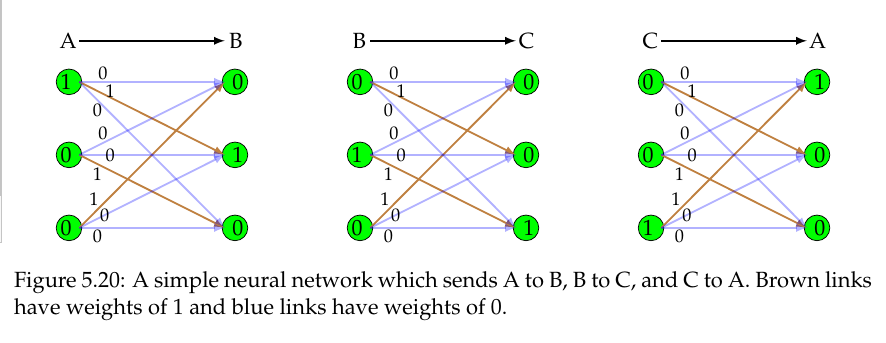

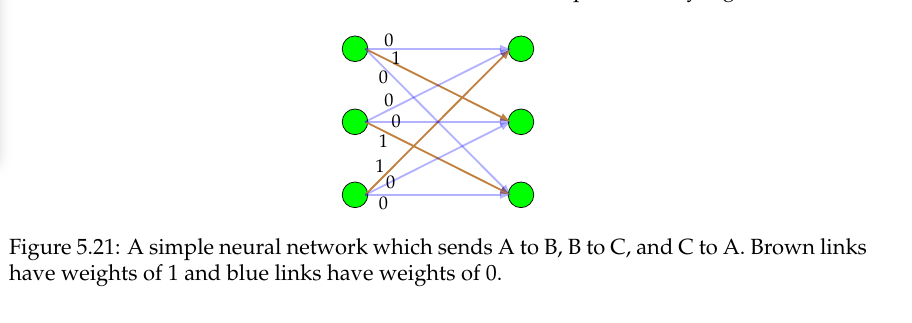

Queremos generar la siguiente secuencia
ABCABCABC...   como lo hacemos.

La siguiente grafica ilustra esto🇰

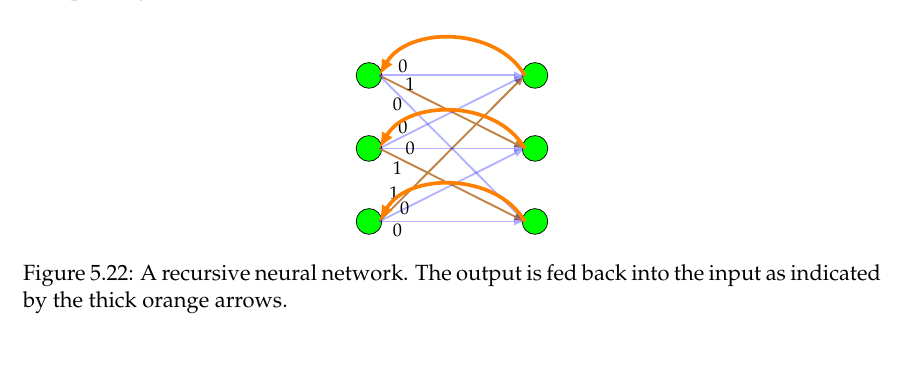







Complicamos un poco el problema. Pensemos que el cartero recibio la orden de quedarse en un lugar. Por ejemplo $A=Bogota$, $B=Medellin$, $C=Cali$,
sale de Bogota , va a Medellin, pero ese dia no viaja sino que se queda en Medellin y al dia siguiente va a Cali $ABBC$. Necesitamos generar mas ecuaciones: (basadas en one-hotkey vectors)
\begin{eqnarray}
\text{stay} \mapsto \begin{pmatrix} 1 \\ 0 \end{pmatrix}  \quad , \quad \text{leave} \mapsto \begin{pmatrix} 0 \\ 1 \end{pmatrix} 
\end{eqnarray}

Necesitamos (obviamente) extender la matriz $M$ para considerar esta nueva condicion:       

\begin{eqnarray}
M = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ -  & -  & -  \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0   
\end{pmatrix}
\end{eqnarray} 

Como funciona el modelo matematico. La identidad esta indicando "stay"  mientras el piso inferior indica leave.

Ejemplo:   

\begin{eqnarray}
M C = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ -  & -  & -  \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0   
\end{pmatrix}   \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ - \\ 1 \\ 0 \\ 0 \end{pmatrix} 
\end{eqnarray}

Definimos una nueva matriz que me simule el quedarse (stay) o irse que es (leave) :    


\begin{eqnarray}
\text{stay-leave} =  \begin{pmatrix} 1 & 0 \\ 
1 & 0 \\ 
1 & 0 \\ 
- & - \\ 
0 & 1 \\
0 & 1 \\ 
0 & 1
\end{pmatrix}
\end{eqnarray}

La idea es que stay $(1,0)^T$, leave $(0,1)^T$.

\begin{eqnarray}
(\text{stay-leave})( \text{stay} ) \begin{pmatrix} 1 & 0 \\ 
1 & 0 \\ 
1 & 0 \\ 
- & - \\ 
0 & 1 \\
0 & 1 \\ 
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\ 
0
\end{pmatrix}
= \begin{pmatrix} 1 \\ 1 \\ 1 \\ - \\ 0 \\ 0 \\ 0\end{pmatrix}
\end{eqnarray}

\begin{eqnarray}
(\text{stay-leave})( \text{leave} ) \begin{pmatrix} 1 & 0 \\ 
1 & 0 \\ 
1 & 0 \\ 
- & - \\ 
0 & 1 \\
0 & 1 \\ 
0 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\ 
1
\end{pmatrix}
= \begin{pmatrix}  0 \\ 0 \\ 0  \\ - \\ 1 \\ 1 \\ 1 \end{pmatrix}
\end{eqnarray}

Vamos a desarrolloar la metodologia empezando en $C=(0,0,1)^T$. (asumamos la condicion "stay")

*  Calculamos la red representada por $M$ y por el modelo stay-leave descrito arriba.

\begin{eqnarray}
MC = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0  \end{pmatrix} \quad , \quad 
(\text{stay-leave}) ( \text{stay} ) = \begin{pmatrix} 1 \\ 1 \\ 1 \\ 0 \\ 0 \\0  \end{pmatrix}
\end{eqnarray}

* sumamos ambos vectores:    


\begin{eqnarray}
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0  \end{pmatrix} + \begin{pmatrix} 1 \\ 1 \\ 1 \\ 0 \\ 0 \\0  \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \\ 2 \\ 1 \\ 0 \\ 0  \end{pmatrix}
\end{eqnarray}

* Aplicamos un filtron no lineal. Al mayor del resultado le asignamos 1 y a los demas 0.

$$R =  \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0\end{pmatrix}  $$

* El vector que tenemos es 6 componentes, necesitamos un vector de 3 componentes.

Para esto usamos una matriz 
$$ Q = \begin{pmatrix} 1 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 1   \end{pmatrix} $$

Multiplicamos $QR$ 🇰
$$ Q R = \begin{pmatrix} 1 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 1   \end{pmatrix}   \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0\end{pmatrix} =    \begin{pmatrix} 0 \\ 0  \\ 1\end{pmatrix} = C$$

Entendamos el efecto de la matriz $Q$.
$$ Q R = \begin{pmatrix} 1 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 1   \end{pmatrix}   \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ y_1 \\ y_2 \\  y_3 \end{pmatrix} =    \begin{pmatrix} x_1 + y_1 \\ x_2 + y_2  \\  x_3 + y_ 3\end{pmatrix} = C$$



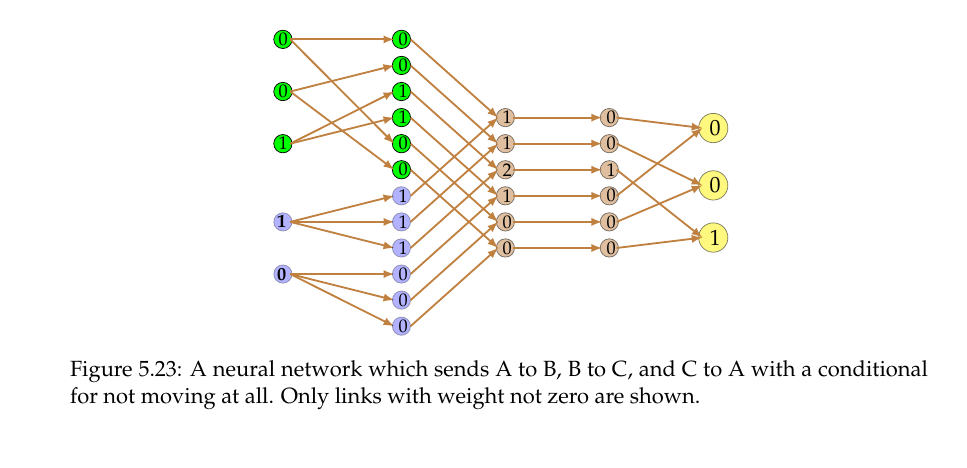

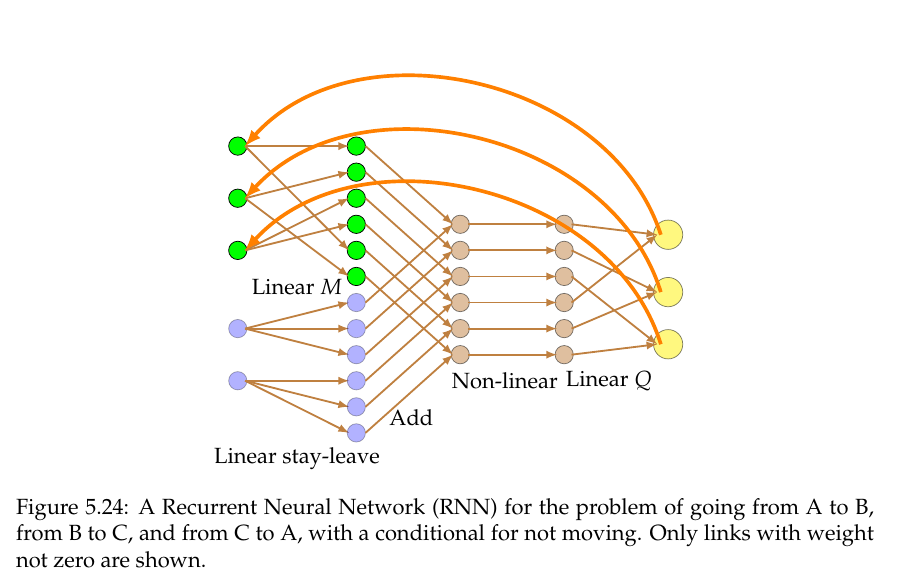

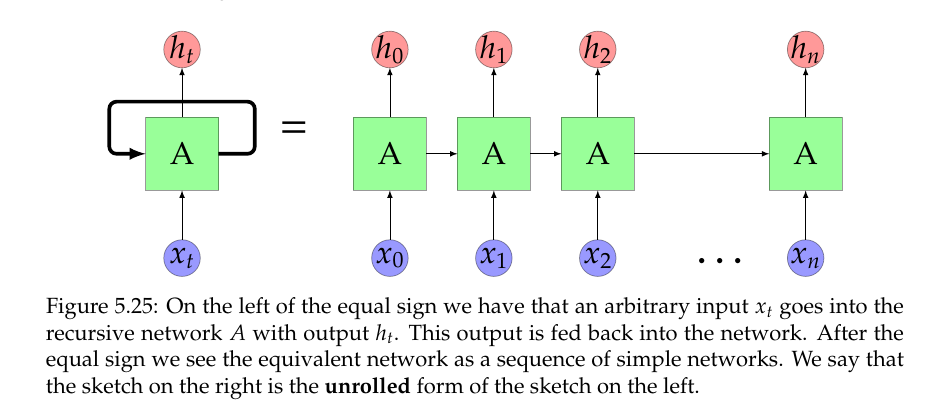

El modelo matematico para esto es el siguiente:     
$$ h_t = f_{\Theta} ( h_{t-1}, x_t)  $$

In [ ]:
# algoritmo, conocidos los tetas (propagacion hacia adelante)
h=0
for i in range(n):  
    x_i = input_data_i
    h = f( np.dot(Theta_x, x_i) + np.dot(Theta_h, h_i)))
    

## Distintos modelos recurrentes (recursivos)

* Una sola entrada una sola salida

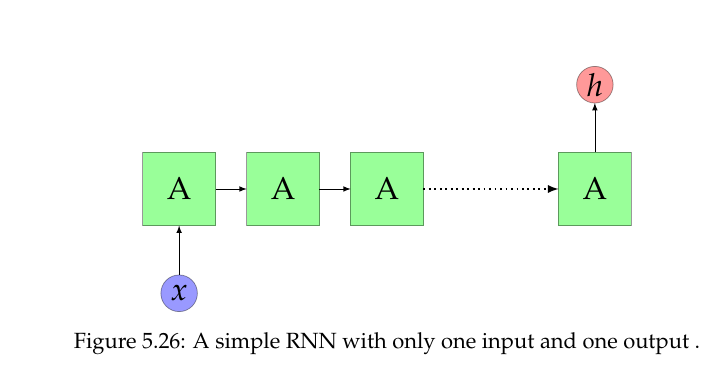

* Una pila (stack) de capas, con varias entradas y varias salidas.

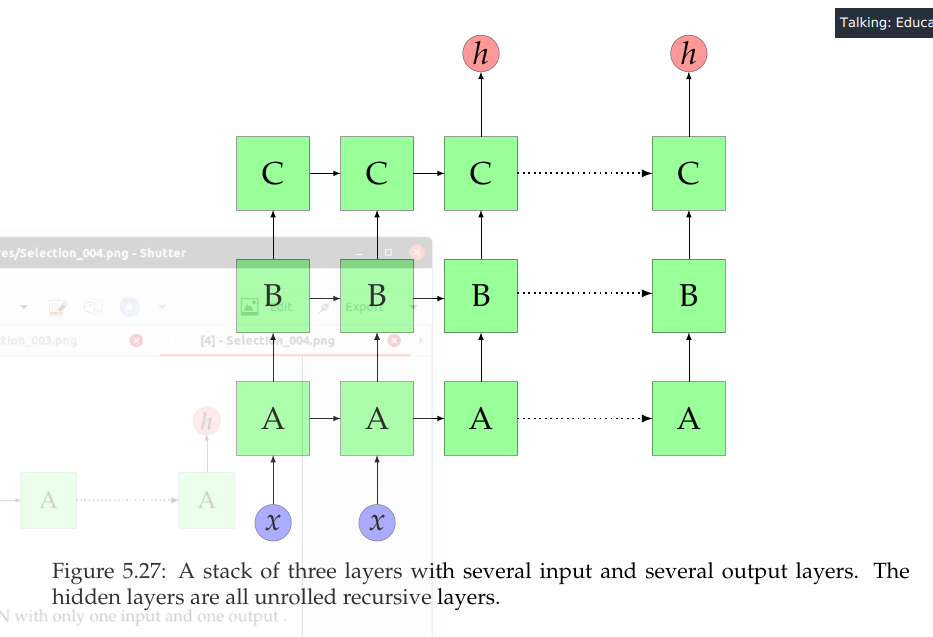